In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='SalePrice', ylabel='Count'>

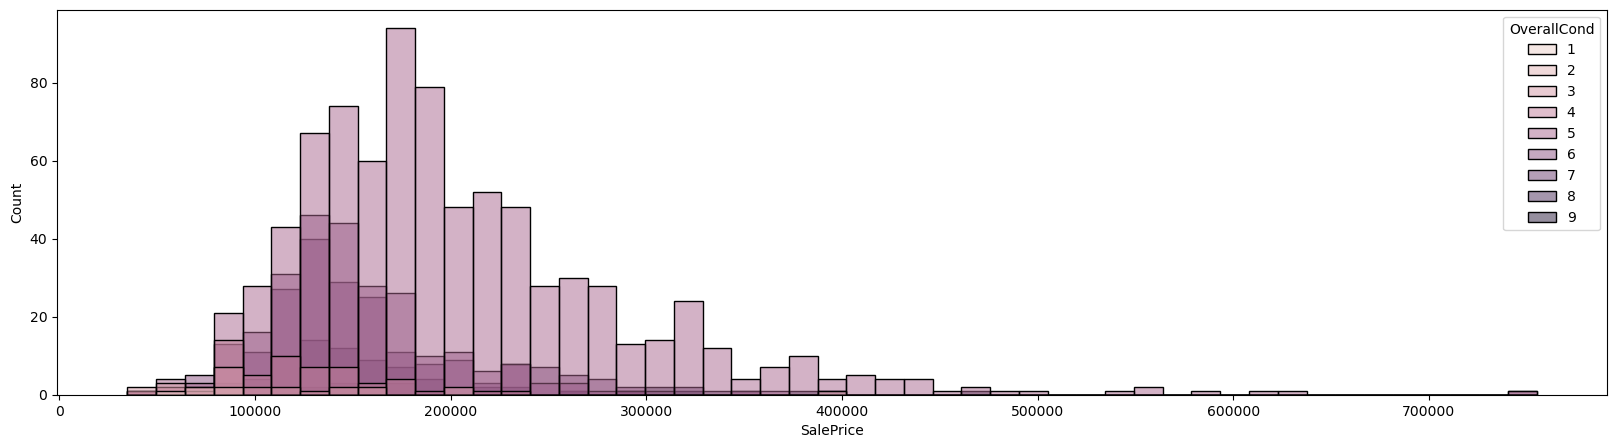

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

target = 'SalePrice'
plt.figure(figsize=(20, 5))
sns.histplot(data=train, x=target, hue='OverallCond')

In [4]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [5]:
categorical_train = train.select_dtypes(include=np.object)
categorical_train.head()

/tmp/ipykernel_20/4132731815.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_train = train.select_dtypes(include=np.object)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [6]:
train.isna().sum().where(lambda x : x>0).dropna()

LotFrontage      259.0
Alley           1369.0
MasVnrType         8.0
MasVnrArea         8.0
BsmtQual          37.0
BsmtCond          37.0
BsmtExposure      38.0
BsmtFinType1      37.0
BsmtFinType2      38.0
Electrical         1.0
FireplaceQu      690.0
GarageType        81.0
GarageYrBlt       81.0
GarageFinish      81.0
GarageQual        81.0
GarageCond        81.0
PoolQC          1453.0
Fence           1179.0
MiscFeature     1406.0
dtype: float64

In [7]:
test.isna().sum().where(lambda x : x>0).dropna()

MSZoning           4.0
LotFrontage      227.0
Alley           1352.0
Utilities          2.0
Exterior1st        1.0
Exterior2nd        1.0
MasVnrType        16.0
MasVnrArea        15.0
BsmtQual          44.0
BsmtCond          45.0
BsmtExposure      44.0
BsmtFinType1      42.0
BsmtFinSF1         1.0
BsmtFinType2      42.0
BsmtFinSF2         1.0
BsmtUnfSF          1.0
TotalBsmtSF        1.0
BsmtFullBath       2.0
BsmtHalfBath       2.0
KitchenQual        1.0
Functional         2.0
FireplaceQu      730.0
GarageType        76.0
GarageYrBlt       78.0
GarageFinish      78.0
GarageCars         1.0
GarageArea         1.0
GarageQual        78.0
GarageCond        78.0
PoolQC          1456.0
Fence           1169.0
MiscFeature     1408.0
SaleType           1.0
dtype: float64

<Axes: >

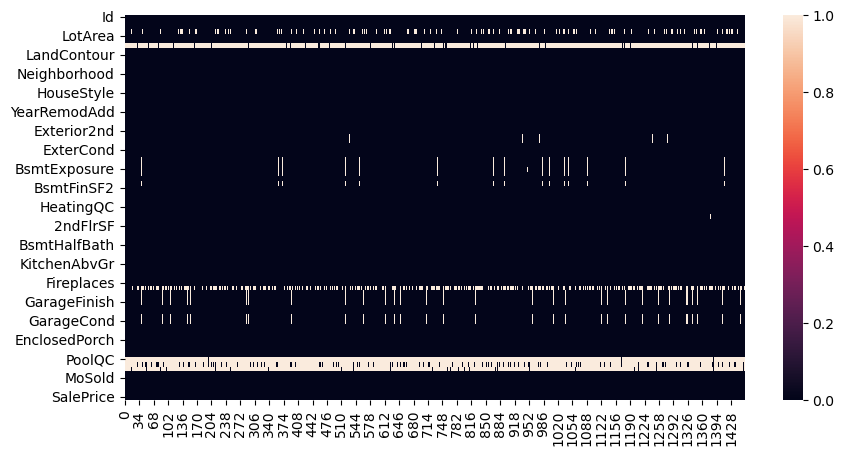

In [8]:
plt.figure(figsize=(10, 5))
sns.heatmap(train.isna().transpose())

<Axes: >

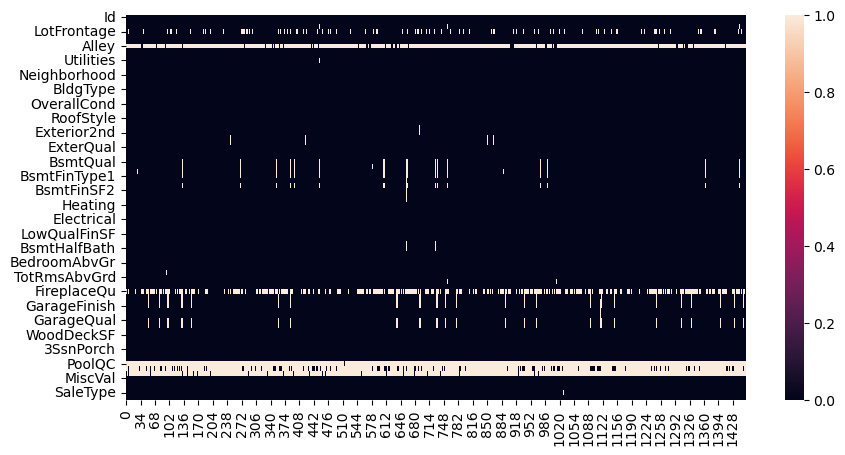

In [9]:
plt.figure(figsize=(10, 5))
sns.heatmap(test.isna().transpose())

In [10]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [11]:
from sklearn.impute import KNNImputer

def fill_na_values(df, col_types):
    df_len = df.shape[0]
    for col in df.columns:
        none_count = df[col].isna().sum()
        df[col+'_isna'] = 0
        if none_count:
            
            df.loc[df[col].isna(), col+'_isna'] = 1
            if col_types[col] == 'object':
                if none_count > int(df_len*0.7):
                    df.drop(col, axis=1, inplace=True)
                else:
                    df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                if none_count > int(df_len/2):
                    df[col].fillna(-1, inplace=True)
                else:
                    imputer = KNNImputer(n_neighbors=5)
                    df[col] = pd.DataFrame(imputer.fit_transform(df[col].to_frame()), index=df.index)
    return df

In [12]:
col_types = train.dtypes
train_notna = fill_na_values(train.copy(), col_types)
test_notna = fill_na_values(test.copy(), col_types)

In [13]:
for col in train_notna.select_dtypes(include=np.object).columns:
    print(col, train_notna[col].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

/tmp/ipykernel_20/3412778417.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for col in train_notna.select_dtypes(include=np.object).columns:


In [14]:
col_to_ordinal_encode = ['CentralAir']
col_to_oh_encode = train_notna.select_dtypes(include=np.object).drop(col_to_ordinal_encode, axis=1).columns

/tmp/ipykernel_20/951540743.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  col_to_oh_encode = train_notna.select_dtypes(include=np.object).drop(col_to_ordinal_encode, axis=1).columns


In [15]:
from sklearn.preprocessing import OneHotEncoder

df_oh_train = train_notna.copy()
df_oh_test = test_notna.copy()

oh = OneHotEncoder()
encoded_train = pd.DataFrame(oh.fit_transform(df_oh_train[col_to_oh_encode]).toarray(), index=df_oh_train.index, columns=oh.get_feature_names_out())
encoded_test = pd.DataFrame(oh.transform(df_oh_test[col_to_oh_encode]).toarray(), index=df_oh_test.index, columns=oh.get_feature_names_out())

df_oh_train = df_oh_train.join(encoded_train)
df_oh_test = df_oh_test.join(encoded_test)

df_oh_train.drop(col_to_oh_encode, axis=1, inplace=True)
df_oh_test.drop(col_to_oh_encode, axis=1, inplace=True)

df_oh_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
df_train_encoded = df_oh_train.copy()
df_test_encoded = df_oh_test.copy()

df_train_encoded[col_to_ordinal_encode[0]].replace('N', 0, inplace=True)
df_train_encoded[col_to_ordinal_encode[0]].replace('Y', 1, inplace=True)

df_test_encoded[col_to_ordinal_encode[0]].replace('N', 0, inplace=True)
df_test_encoded[col_to_ordinal_encode[0]].replace('Y', 1, inplace=True)

In [17]:
df_train_encoded.drop('Id', axis=1, inplace=True)
df_test_encoded.drop('Id', axis=1, inplace=True)

In [18]:
from sklearn.model_selection import train_test_split

X = df_train_encoded.drop(target, axis=1)
y = df_train_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor

model_cb = CatBoostRegressor(verbose=False)
model_cb.fit(X_train, y_train)
pred_cb_1 = model_cb.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, pred_cb_1))

0.07459796181600664


In [21]:
from sklearn.linear_model import LinearRegression

model_ln_1 = LinearRegression()
model_ln_1.fit(X_train, y_train)
pred_ln_1 = model_ln_1.predict(X_test)
print(mean_absolute_percentage_error(y_test, pred_ln_1))

0.09923153494158991


In [22]:
from sklearn.linear_model import Ridge


model_ln_2 = Ridge(alpha=0.15)
model_ln_2.fit(X_train, y_train)
pred_ln_2 = model_ln_2.predict(X_test)
print(mean_absolute_percentage_error(y_test, pred_ln_2))

0.09821528939208746


In [23]:
from sklearn.feature_selection import RFECV

model_ln_3 = Ridge(alpha=0.15)
pipeline_ln_3 = Pipeline([('rfecv', RFECV(Ridge(alpha=0.15))), ('model', CatBoostRegressor(verbose=False))])
pipeline_ln_3.fit(X_train, y_train)

Pipeline(steps=[('rfecv', RFECV(estimator=Ridge(alpha=0.15))),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7e8adc124eb0>)])

In [24]:
rfecv_features = pd.DataFrame(pipeline_ln_3['rfecv'].support_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_cols = list(rfecv_features.loc[rfecv_features.Rank==True].index)
rfecv_features.loc[rfecv_features.Rank==True]

,Rank
Electrical_FuseP,True
LotShape_Reg,True
Street_Pave,True
HeatingQC_Po,True
Heating_OthW,True
...,...
Exterior2nd_CmentBd,True
Exterior2nd_HdBoard,True
Neighborhood_NAmes,True
Exterior2nd_Other,True


In [25]:
pred_ln_3 = pipeline_ln_3.predict(X_test)
print(mean_absolute_percentage_error(y_test, pred_ln_3))

0.09713862539166858


In [26]:
!pip install lightgbm 

In [27]:
from lightgbm import LGBMRegressor

model_lgbm_1 = LGBMRegressor()
model_lgbm_1.fit(X_train, y_train)
pred_lgbm_1 = model_lgbm_1.predict(X_test)
print(mean_absolute_percentage_error(y_test, pred_lgbm_1))

0.08114473631501122


In [28]:
X_train = df_train_encoded.drop(target, axis=1)
y_train = df_train_encoded[target]
X_test = df_test_encoded

In [29]:
model_cb = CatBoostRegressor(verbose=False)
model_cb.fit(X_train, y_train)
pred_cb_1 = model_cb.predict(X_test)

In [30]:
sample_submission_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = pred_cb_1
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,121105.209310
1,1462,161280.238457
2,1463,188238.549403
3,1464,193097.738927
4,1465,178228.638706
